# Sentiment Analysis

Analyse the sentiments of the tweets of the 3 politicians to see who is mor expressive and who is more diplomatic in their ways

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from textblob import TextBlob

### Read the clean data

In [2]:
trump = pd.read_csv("data/DonaldTrumpClean.csv")
obama = pd.read_csv("data/BarackObamaClean.csv")
clinton = pd.read_csv("data/HillaryClintonClean.csv")

### Define function to attach sentiments

In [3]:
def getSentiment(df_tweet_polarity_desc):
    if df_tweet_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif df_tweet_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

### Use textBlob to calculate the sentiment score and the polarity score

In [4]:
def textBlob(df):
    bloblist_desc = list()
    df_tweet_descr_str=df['text'].astype(str)
    for row in df_tweet_descr_str:
        blob = TextBlob(row)
        bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
        df_tweet_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])

    df['sentiment'] = df_tweet_polarity_desc['sentiment']
    df['polarity'] = df_tweet_polarity_desc['polarity']
    return df

In [5]:
trump = textBlob(trump)
trump['Sentiment_Type'] = trump.apply(getSentiment, axis=1)

obama = textBlob(obama)
obama['Sentiment_Type'] = obama.apply(getSentiment, axis=1)

clinton = textBlob(clinton)
clinton['Sentiment_Type'] = clinton.apply(getSentiment, axis=1)

### Calculate number of positive, negative, and neutral tweets

In [7]:
trump_group = trump.groupby("Sentiment_Type").size().reset_index(name="Trump tweets")
obama_group = obama.groupby("Sentiment_Type").size().reset_index(name="Obama tweets")
clinton_group = clinton.groupby("Sentiment_Type").size().reset_index(name="Clinton tweets")

### Convert the numbers into a percentage so that all 3 are politicians are represented equally

In [8]:
trump_group['Trump tweets'] = trump_group['Trump tweets']*100/trump_group['Trump tweets'].sum()
obama_group['Obama tweets'] = obama_group['Obama tweets']*100/obama_group['Obama tweets'].sum()
clinton_group['Clinton tweets'] = clinton_group['Clinton tweets']*100/clinton_group['Clinton tweets'].sum()

### Join all 3 data frames to create 1 combined dataframe which will be used for plotting

In [10]:
sentiment_df = trump_group.set_index('Sentiment_Type').join(obama_group.set_index('Sentiment_Type')).join(clinton_group.set_index('Sentiment_Type'))

In [12]:
sentiment_df = sentiment_df.reset_index()

### Plot the graph

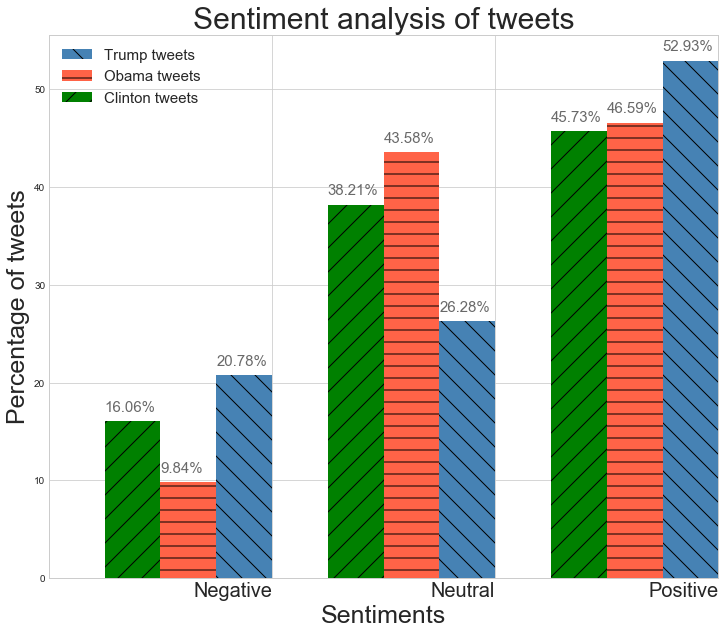

In [77]:
DIMS = (12,10)
width=0.25

#Create the figure
fig = plt.figure(figsize=DIMS)

#Add the subplot
ax = fig.add_subplot(111)

#Plot the tweets
sentiment_df.plot(kind='bar', x='Sentiment_Type', y='Trump tweets', ax=ax, position=1, width=width, color='steelblue', hatch="\\")
sentiment_df.plot(kind='bar', x='Sentiment_Type', y='Obama tweets', ax=ax, position=2, width=width, color='tomato',  hatch='-')
sentiment_df.plot(kind='bar', x='Sentiment_Type', y='Clinton tweets', ax=ax, position=3, width=width, color='green',  hatch='/')

#Add the x axis labels of the plot
ax.set_xticklabels(["Negative","Neutral", "Positive"], rotation=0, fontsize=20, horizontalalignment="right")

#Add the title of the plot
ax.set_title("Sentiment analysis of tweets", fontsize=30)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height()+1, \
            str(round((i.get_height()), 2))+"%", fontsize=15, color='dimgrey', horizontalalignment='left')
    
plt.xlabel("Sentiments", fontsize=25)
plt.ylabel("Percentage of tweets", fontsize=25)
plt.legend(fontsize=15)
#Finally, show the plot
plt.show()

From this graph, we can derive the following insights:
    1. Obama rarely publishes negative tweets
    2. Obama is more diplomatic and keeps his tweets also mostly neutral
    3. Trump is very expressive of his feelings (He has the highest in Positive as well as Negative)
    4. Clinton is moderate in her tweets and has a max of all 3 sentiments